 ## <center> CCT College Dublin <center>

 ## <center> Continuous Assessment 2 - Strategic Thinking <center>

 ## <center> Cryptocurrence Historical Prices<center>
    
### <center>TEAM 3: Eduarda Schein, Marilia Silva, Gustavo Martinele, Erica Lima, Lucas Pontes, Muhammad Nauman

## Data Understanding

In [1]:
#Data Dictionary:



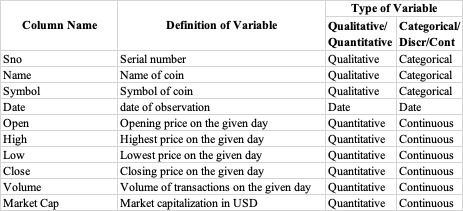

In [70]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas_datareader.data as web

import seaborn as sns
import datetime
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff

#Preprocessing
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import MinMaxScaler
from matplotlib import scale

# modelling:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression


# Handling warnings
import warnings
warnings.filterwarnings('ignore')

#Table of contents:
from tabulate import tabulate
tabulate.WIDE_CHARS_MODE = False

#T-Test:
from scipy.stats import ttest_rel

In [3]:
df_btc = pd.read_csv("coin_Bitcoin.csv")
df_eth = pd.read_csv("coin_Ethereum.csv")
df_usdt = pd.read_csv("coin_Tether.csv")
df_bnb = pd.read_csv("coin_BinanceCoin.csv")
df_usdc = pd.read_csv("coin_USDCoin.csv")
df_sol = pd.read_csv("coin_Solana.csv")
df_xrp = pd.read_csv("coin_XRP.csv")
df_ada = pd.read_csv("coin_Cardano.csv")

In [4]:
df_crypto= pd.concat([df_btc, df_eth,df_usdt, df_bnb, df_usdc, df_sol,df_xrp, df_ada])

In [5]:
#ProfileReport(df_crypto)

In [6]:
df_crypto.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [7]:
df_crypto.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
1369,1370,Cardano,ADA,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10
1370,1371,Cardano,ADA,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10
1371,1372,Cardano,ADA,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10
1372,1373,Cardano,ADA,2021-07-05 23:59:59,1.461221,1.379284,1.461221,1.404898,1.759461e+09,4.488134e+10
1373,1374,Cardano,ADA,2021-07-06 23:59:59,1.456887,1.393282,1.404712,1.418053,1.477700e+09,4.530158e+10


In [8]:
df_crypto.shape

(14632, 10)

In [9]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14632 entries, 0 to 1373
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        14632 non-null  int64  
 1   Name       14632 non-null  object 
 2   Symbol     14632 non-null  object 
 3   Date       14632 non-null  object 
 4   High       14632 non-null  float64
 5   Low        14632 non-null  float64
 6   Open       14632 non-null  float64
 7   Close      14632 non-null  float64
 8   Volume     14632 non-null  float64
 9   Marketcap  14632 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.2+ MB


In [10]:
df_crypto.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,1.463200e+04,1.463200e+04
mean,1112.097936,1473.936220,1385.242782,1431.877953,1434.332398,6.787654e+09,3.552592e+10
std,768.958232,5943.653197,5558.036929,5765.649516,5771.759534,1.817132e+10,1.092216e+11
min,1.000000,0.003082,0.002802,0.002809,0.002810,0.000000e+00,0.000000e+00
25%,458.750000,0.470923,0.438239,0.454068,0.455102,1.911512e+07,7.254668e+08
50%,981.000000,1.024013,1.001554,1.010482,1.010586,2.717045e+08,4.101430e+09
75%,1676.250000,245.776497,235.253754,240.197436,240.326001,3.548535e+09,1.968992e+10
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [11]:
df_crypto.describe(include=object)

,Name,Symbol,Date
count,14632,14632,14632
unique,8,8,2991
top,Bitcoin,BTC,2021-07-06 23:59:59
freq,2991,2991,8


### ScatterPlots

We plot ScatterPlots to show some linear correlation among variables.

Text(0.5, 1.0, 'Corr between High and Marketcap')

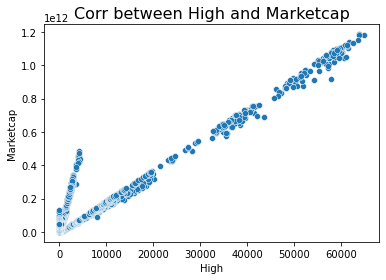

In [12]:
sns.scatterplot(data=df_crypto, x='High', y='Marketcap')
plt.title("Corr between High and Marketcap", fontsize = 16)

Text(0.5, 1.0, 'Corr between High and Close')

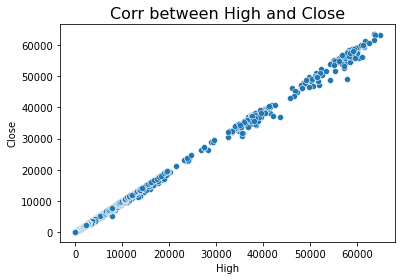

In [13]:
sns.scatterplot(data=df_crypto, x='High', y='Close')
plt.title("Corr between High and Close", fontsize = 16)

<AxesSubplot:>

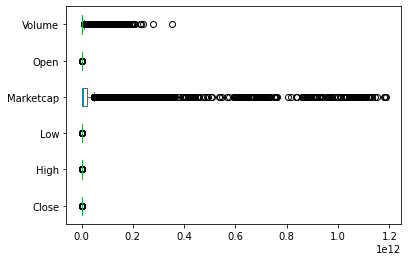

In [14]:
#verifying outliers:

exclude = ['SNo', 'Name', 'Symbol', 'Date']
df_crypto.loc[:, df_crypto.columns.difference(exclude)].plot.box(grid=False, fontsize=10, vert=False)

In [15]:
#creating a new data frame with metric 'CLOSE':
df= pd.DataFrame({'BTC': df_btc['Close'],'ETH': df_eth ['Close'], 'USDT' : df_usdt ['Close'],'BNB': df_bnb ['Close'], 'USDC': df_usdc ['Close'], 'SOL': df_sol ['Close'], 'XRP': df_xrp ['Close'], 'ADA': df_ada ['Close']})

In [16]:
df.head()

,BTC,ETH,USDT,BNB,USDC,SOL,XRP,ADA
0,144.539993,0.753325,1.205740,0.105138,1.00686,0.776819,0.005613,0.025932
1,139.000000,0.701897,0.606502,0.107737,1.00962,0.882507,0.004680,0.020816
2,116.989998,0.708448,0.606229,0.104067,1.00978,0.777832,0.004417,0.021931
3,105.209999,1.067860,1.000000,0.107811,1.01272,0.661925,0.004254,0.021489
4,97.750000,1.217440,1.000000,0.106414,1.00743,0.646651,0.004291,0.018539


### Measures of variability

In [17]:
df.describe()

,BTC,ETH,USDT,BNB,USDC,SOL,XRP,ADA
count,2991.000000,2160.000000,2318.000000,1442.000000,1002.000000,452.000000,2893.000000,1374.000000
mean,6711.290443,383.910691,1.000696,52.250308,1.003791,10.471388,0.234790,0.256313
std,11298.141921,601.078766,0.014951,115.390917,0.006822,14.114444,0.338629,0.409691
min,68.431000,0.434829,0.606229,0.099867,0.970124,0.515273,0.002810,0.018539
25%,430.569489,13.819200,1.000000,10.068350,1.000017,1.424761,0.007346,0.045947
50%,2286.409912,198.643691,1.000020,16.210569,1.001152,2.881389,0.182608,0.087002
75%,8576.238715,386.435272,1.002228,27.691107,1.005395,14.362851,0.312465,0.183379
max,63503.457930,4168.701049,1.205740,675.684077,1.044029,55.910960,3.377810,2.309113


### Daily Returns

In [18]:
#the average daily return 

DR = df.pct_change(1)

print('The average daily return:')
DR.mean().sort_values(ascending=False)

The average daily return:


XRP     0.004332
ETH     0.004094
BNB     0.004093
BTC     0.002741
ADA     0.002698
SOL     0.001930
USDT    0.000061
USDC    0.000001
dtype: float64

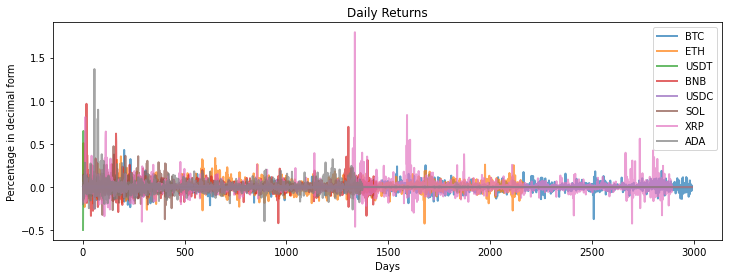

In [19]:
#Daily returns ( variance, std)
plt.figure(figsize= (12,4))
for c in DR.columns.values:
    plt.plot(DR.index, DR[c], lw = 2, alpha = .7)

plt.title('Daily Returns')
plt.ylabel('Percentage in decimal form')
plt.xlabel('Days')
plt.legend(DR.columns.values, loc = 'upper right')
plt.show()

### Heat Map Correlation

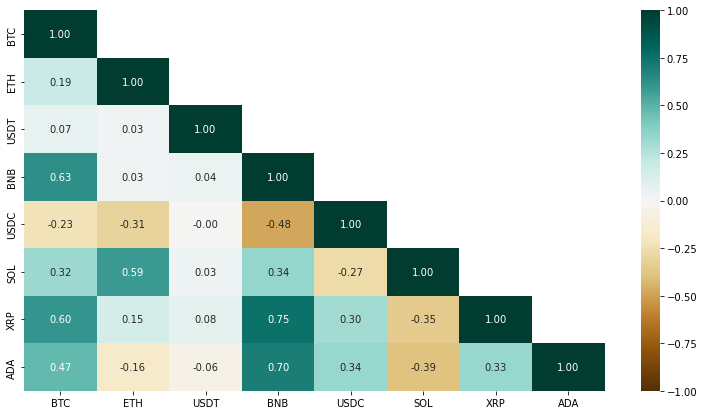

In [20]:
corr = df.corr()
plt.figure(figsize=(13,7))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
heat_map = sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, fmt='.2f', cmap= 'BrBG')

rotx = heat_map.set_xticklabels(heat_map.get_xticklabels())
roty = heat_map.set_yticklabels(heat_map.get_yticklabels())

In [21]:
DR.corr()

,BTC,ETH,USDT,BNB,USDC,SOL,XRP,ADA
BTC,1.000000,-0.005488,-0.024048,0.009882,0.002423,0.031423,-0.017379,0.029515
ETH,-0.005488,1.000000,0.141517,0.004398,0.003060,-0.046709,0.027516,0.034608
USDT,-0.024048,0.141517,1.000000,-0.000452,0.001213,-0.095663,0.019262,0.029059
BNB,0.009882,0.004398,-0.000452,1.000000,-0.003913,0.014242,0.000283,0.010918
USDC,0.002423,0.003060,0.001213,-0.003913,1.000000,0.003936,0.017129,0.007269
SOL,0.031423,-0.046709,-0.095663,0.014242,0.003936,1.000000,-0.018164,-0.006641
XRP,-0.017379,0.027516,0.019262,0.000283,0.017129,-0.018164,1.000000,0.003707
ADA,0.029515,0.034608,0.029059,0.010918,0.007269,-0.006641,0.003707,1.000000


### Volatility 

In [22]:
#get the volatility through the std ( square root of the variance)
print('The cryptocurrency volatility')
DR.std().sort_values(ascending=False)

The cryptocurrency volatility


XRP     0.080222
ADA     0.056714
BNB     0.055724
ETH     0.053621
BTC     0.042639
SOL     0.036955
USDT    0.015612
USDC    0.002656
dtype: float64

In [23]:
#Daily Cumulative Return
DCR = (DR+1).cumprod()

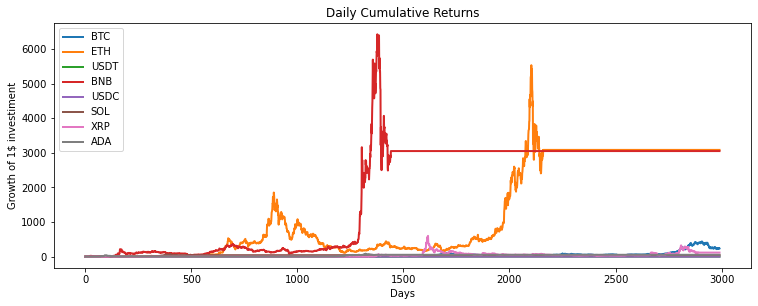

In [24]:
#Daily returns ( variance, std)
plt.figure(figsize= (12.5,4.5))
for c in DCR.columns.values:
    plt.plot(DCR.index, DCR[c], lw = 2, label = c)

plt.title('Daily Cumulative Returns')
plt.ylabel('Growth of 1$ investiment')
plt.xlabel('Days')
plt.legend(DCR.columns.values, loc = 'upper left')
plt.show()

#### Bitcoin

In [25]:
df_btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [26]:
df_btc.shape

(2991, 10)

In [27]:
df_btc.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


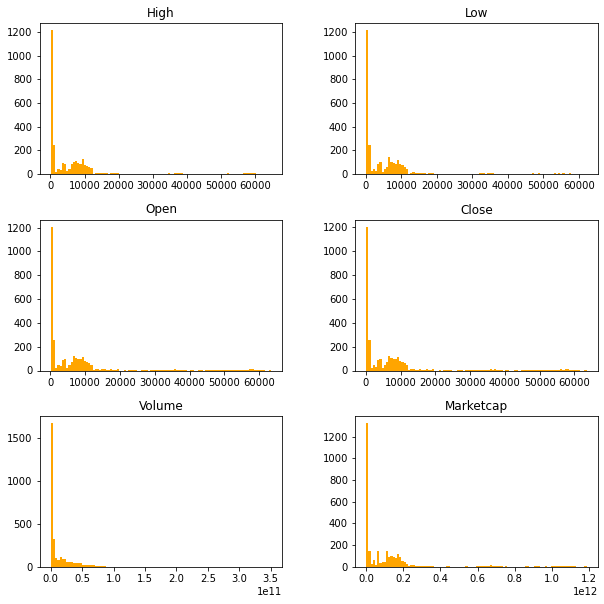

In [28]:
df_btc.hist(column=['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'],figsize=(10,10),color="orange",bins=100, grid=False);

#### Solano

In [29]:
df_sol.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.0
1,2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.0
2,3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.0
3,4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.0
4,5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.0


In [30]:
df_sol.shape

(452, 10)

In [31]:
df_sol.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,452.000000,452.000000,452.000000,452.000000,452.000000,4.520000e+02,4.520000e+02
mean,226.500000,11.190482,9.647555,10.400225,10.471388,1.956751e+08,2.588164e+09
std,130.625419,15.148788,13.006301,14.082328,14.114444,3.906998e+08,3.985932e+09
min,1.000000,0.559759,0.505194,0.513391,0.515273,6.520201e+05,0.000000e+00
25%,113.750000,1.484753,1.311024,1.410480,1.424761,7.851473e+06,3.056948e+07
50%,226.500000,3.018518,2.483870,2.867550,2.881389,1.858893e+07,1.042625e+08
75%,339.250000,15.270240,13.774265,14.262057,14.362851,1.802343e+08,3.811371e+09
max,452.000000,58.302927,46.187557,56.089257,55.910960,2.772225e+09,1.524342e+10


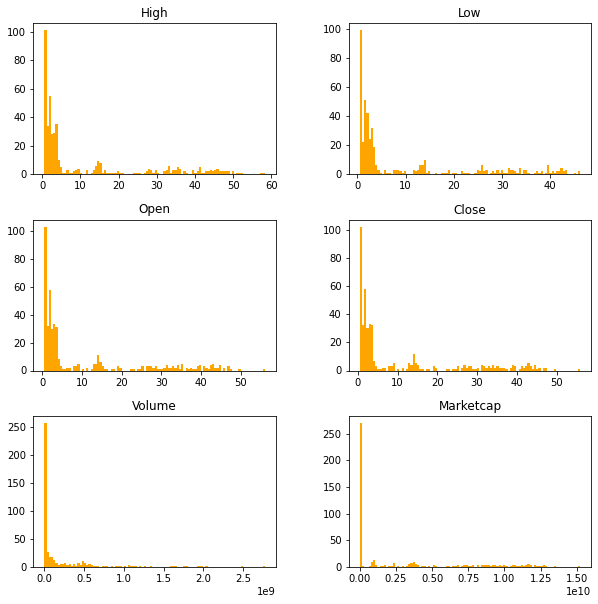

In [32]:
df_sol.hist(column=['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'],figsize=(10,10),color="orange",bins=100, grid=False);

#### Ethereum

In [33]:
df_eth.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [34]:
df_eth.shape

(2160, 10)

In [35]:
df_eth.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


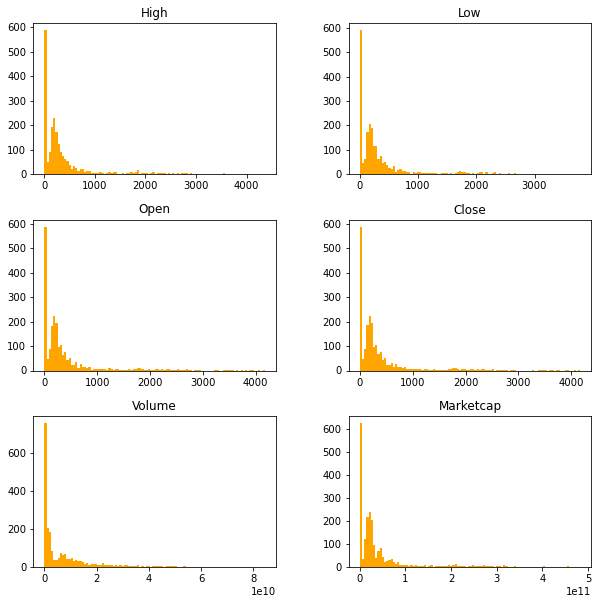

In [36]:
df_eth.hist(column=['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'],figsize=(10,10),color="orange",bins=100, grid=False);

#### XRP

In [37]:
df_xrp.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07


In [38]:
df_xrp.shape

(2893, 10)

In [39]:
df_xrp.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2.893000e+03,2.893000e+03
mean,1447.000000,0.246591,0.222000,0.234548,0.234790,1.260299e+09,9.678507e+09
std,835.281489,0.365393,0.311581,0.338544,0.338629,3.137958e+09,1.385907e+10
min,1.000000,0.003082,0.002802,0.002809,0.002810,0.000000e+00,2.196991e+07
25%,724.000000,0.007531,0.007093,0.007332,0.007346,4.780950e+05,2.263168e+08
50%,1447.000000,0.189184,0.176196,0.181968,0.182608,1.119370e+08,7.523251e+09
75%,2170.000000,0.320751,0.303941,0.312021,0.312465,1.238721e+09,1.306444e+10
max,2893.000000,3.841940,3.117340,3.363570,3.377810,3.695518e+10,1.308535e+11


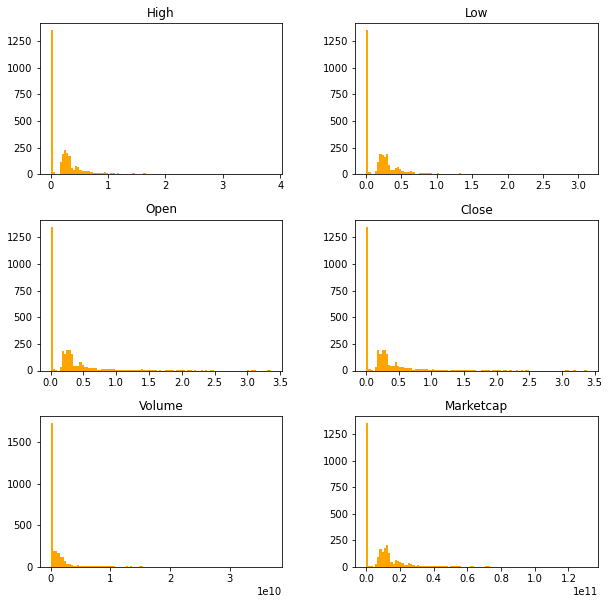

In [40]:
df_xrp.hist(column=['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'],figsize=(10,10),color="orange",bins=100, grid=False);

#### ADA

In [41]:
df_ada.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [42]:
df_ada.shape

(1374, 10)

In [43]:
df_ada.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1.374000e+03,1.374000e+03
mean,687.500000,0.269807,0.239710,0.255287,0.256313,8.934183e+08,7.603454e+09
std,396.783946,0.433523,0.380928,0.408456,0.409691,2.107653e+09,1.303878e+10
min,1.000000,0.021050,0.017620,0.018414,0.018539,1.739460e+06,4.806646e+08
25%,344.250000,0.047565,0.044601,0.045898,0.045947,5.014830e+07,1.191263e+09
50%,687.500000,0.090274,0.083164,0.086867,0.087002,1.186742e+08,2.270889e+09
75%,1030.750000,0.194519,0.172442,0.181374,0.183379,4.875977e+08,5.174547e+09
max,1374.000000,2.461766,2.013285,2.300190,2.309113,1.914198e+10,7.377224e+10


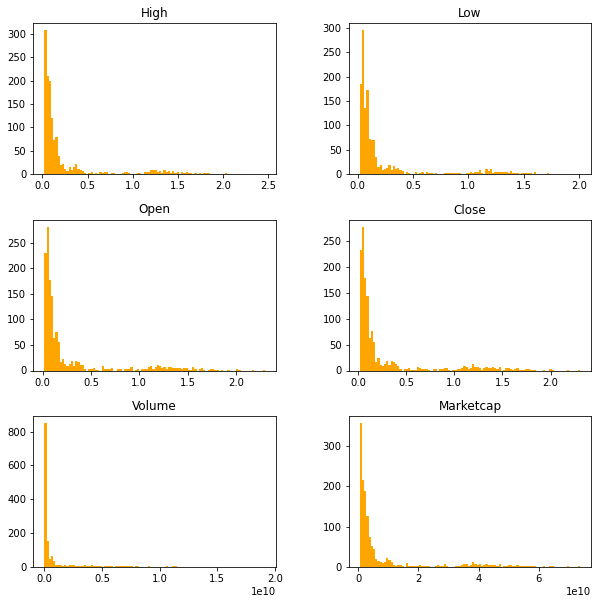

In [44]:
df_ada.hist(column=['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'],figsize=(10,10),color="orange",bins=100, grid=False);

## Data Preparation

### Feature Engineering

#df_crypto:
#Renaming columns:

df_crypto = df_crypto.rename(columns={"High": "Maximum", "Low": "Minimum"})
df_crypto.head()

### Treating Data Column

#### Bitcoin:

In [45]:
#Creating columns for Month and Year
df_btc['Month'] = pd.DatetimeIndex(pd.to_datetime(df_btc['Date'], dayfirst=True)).month
df_btc['Year'] = pd.DatetimeIndex(pd.to_datetime(df_btc['Date'], dayfirst=True)).year
df_btc['Day'] = pd.DatetimeIndex(pd.to_datetime(df_btc['Date'], dayfirst= True)).day

#Checking all the changes so far
df_btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,4,2013,29
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,4,2013,30
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,5,2013,1
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,5,2013,2
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,5,2013,3


In [46]:
df_btc.set_index('SNo')

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
SNo,,,,,,,,,,,,
1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,4,2013,29
2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,4,2013,30
3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,5,2013,1
4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,5,2013,2
5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,5,2013,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,7,2021,2
2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,7,2021,3
2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,7,2021,4


#### Solano:

In [47]:
#Creating columns for Month and Year
df_sol['Month'] = pd.DatetimeIndex(pd.to_datetime(df_sol['Date'], dayfirst=True)).month
df_sol['Year'] = pd.DatetimeIndex(pd.to_datetime(df_sol['Date'], dayfirst=True)).year
df_sol['Day'] = pd.DatetimeIndex(pd.to_datetime(df_sol['Date'], dayfirst= True)).day

#Checking all the changes so far
df_sol.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
0,1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.0,4,2020,11
1,2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.0,4,2020,12
2,3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.0,4,2020,13
3,4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.0,4,2020,14
4,5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.0,4,2020,15


In [48]:
df_sol.set_index('SNo')

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
SNo,,,,,,,,,,,,
1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.000000e+00,4,2020,11
2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.000000e+00,4,2020,12
3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.000000e+00,4,2020,13
4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.000000e+00,4,2020,14
5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.000000e+00,4,2020,15
...,...,...,...,...,...,...,...,...,...,...,...,...
448,Solana,SOL,2021-07-02 23:59:59,34.031786,31.479924,33.306310,34.020482,4.402988e+08,9.275257e+09,7,2021,2
449,Solana,SOL,2021-07-03 23:59:59,35.404770,33.298475,34.015575,34.478816,3.270200e+08,9.400216e+09,7,2021,3
450,Solana,SOL,2021-07-04 23:59:59,35.502372,33.555737,34.495117,34.310601,3.034205e+08,9.354354e+09,7,2021,4


#### Ethereum:

In [49]:
#Creating columns for Month and Year
df_eth['Month'] = pd.DatetimeIndex(pd.to_datetime(df_eth['Date'], dayfirst=True)).month
df_eth['Year'] = pd.DatetimeIndex(pd.to_datetime(df_eth['Date'], dayfirst=True)).year
df_eth['Day'] = pd.DatetimeIndex(pd.to_datetime(df_eth['Date'], dayfirst= True)).day

#Checking all the changes so far
df_eth.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07,8,2015,8
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07,8,2015,9
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07,8,2015,10
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07,8,2015,11
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07,8,2015,12


In [50]:
df_eth.set_index('SNo')

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
SNo,,,,,,,,,,,,
1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07,8,2015,8
2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07,8,2015,9
3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07,8,2015,10
4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07,8,2015,11
5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07,8,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,7,2021,2
2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,7,2021,3
2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,7,2021,4


#### XRP:

In [51]:
#Creating columns for Month and Year
df_xrp['Month'] = pd.DatetimeIndex(pd.to_datetime(df_xrp['Date'], dayfirst=True)).month
df_xrp['Year'] = pd.DatetimeIndex(pd.to_datetime(df_xrp['Date'], dayfirst=True)).year
df_xrp['Day'] = pd.DatetimeIndex(pd.to_datetime(df_xrp['Date'], dayfirst= True)).day

#Checking all the changes so far
df_xrp.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07,8,2013,5
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07,8,2013,6
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07,8,2013,7
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07,8,2013,8
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07,8,2013,9


In [52]:
df_xrp.set_index('SNo')

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
SNo,,,,,,,,,,,,
1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07,8,2013,5
2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07,8,2013,6
3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07,8,2013,7
4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07,8,2013,8
5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07,8,2013,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10,7,2021,2
2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10,7,2021,3
2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10,7,2021,4


#### ADA:

In [53]:
#Creating columns for Month and Year
df_ada['Month'] = pd.DatetimeIndex(pd.to_datetime(df_ada['Date'], dayfirst=True)).month
df_ada['Year'] = pd.DatetimeIndex(pd.to_datetime(df_ada['Date'], dayfirst=True)).year
df_ada['Day'] = pd.DatetimeIndex(pd.to_datetime(df_ada['Date'], dayfirst= True)).day

#Checking all the changes so far
df_ada.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08,10,2017,2
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08,10,2017,3
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08,10,2017,4
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08,10,2017,5
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08,10,2017,6


In [54]:
df_ada.set_index('SNo')

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day
SNo,,,,,,,,,,,,
1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08,10,2017,2
2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08,10,2017,3
3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08,10,2017,4
4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08,10,2017,5
5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08,10,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1370,Cardano,ADA,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10,7,2021,2
1371,Cardano,ADA,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10,7,2021,3
1372,Cardano,ADA,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10,7,2021,4


#Label Encoder used to avoid sparse data:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df_crypto['Symbol'])

df_crypto['Symbol_Encoded'] = le.transform(df_crypto['Symbol'])
df_crypto.head()

In [55]:
df_btc1 = df_btc.drop(columns = ['Symbol', 'Name'])
df_sol1 = df_sol.drop(columns = ['Symbol', 'Name'])
df_eth1 = df_eth.drop(columns = ['Symbol', 'Name'])
df_xrp1 = df_xrp.drop(columns = ['Symbol', 'Name'])
df_ada1 = df_ada.drop(columns = ['Symbol', 'Name'])

### Outliers

Text(0.5, 1.0, 'Outliers Bitcoin')

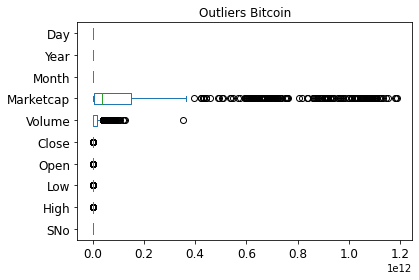

In [56]:
df_btc1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers Bitcoin", fontsize = 12)

Text(0.5, 1.0, 'Outliers Solano')

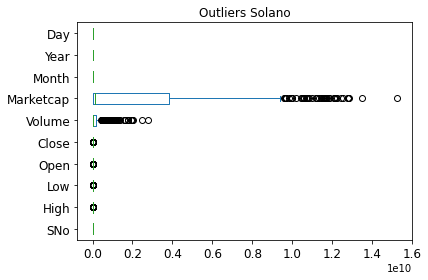

In [57]:
df_sol1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers Solano", fontsize = 12)

Text(0.5, 1.0, 'Outliers Ethereum')

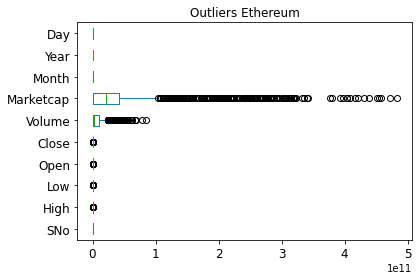

In [58]:
df_eth1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers Ethereum", fontsize = 12)

Text(0.5, 1.0, 'Outliers XRP')

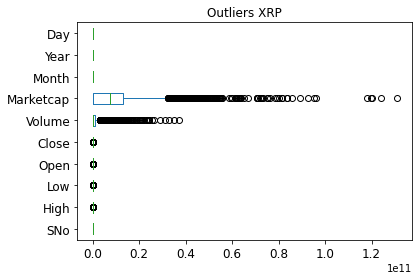

In [59]:
df_xrp1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers XRP", fontsize = 12)

Text(0.5, 1.0, 'Outliers ADA')

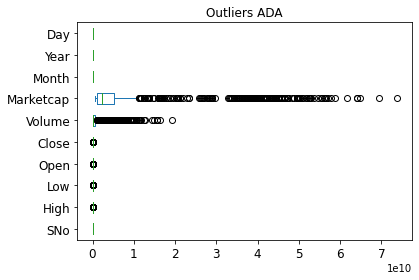

In [60]:
df_ada1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers ADA", fontsize = 12)

### Scaling

#MinMaxScaler will be used because outliers matters on this study and this method preserve them:

scaled = MinMaxScaler()

#### Bitcoin:

bit_scaled = scaled.fit_transform(df_btc1.drop(columns=['SNo', 'Date']))
bit_scaled

bit_scaled = pd.DataFrame(bit_scaled, columns = ['High', 'Low','Open','Close','Volume','Marketcap','Month','Year','Day'])
bit_scaled.head()

bit_scaled = bit_scaled.join(df_btc1[['Date']])
bit_scaled.head()

#### Solano

sol_scaled = scaled.fit_transform(df_sol1.drop(columns=['SNo','Date']))
sol_scaled

sol_scaled = pd.DataFrame(sol_scaled, columns = ['High', 'Low','Open','Close','Volume','Marketcap','Month','Year','Day'])
sol_scaled.head()

sol_scaled = sol_scaled.join(df_sol1[['Date']])
sol_scaled.head()

#### Ethereum

eth_scaled = scaled.fit_transform(df_eth1.drop(columns=['SNo','Date']))
eth_scaled

eth_scaled = pd.DataFrame(eth_scaled, columns = ['High', 'Low','Open','Close','Volume','Marketcap','Month','Year','Day'])
eth_scaled.head()

eth_scaled = eth_scaled.join(df_eth1[['Date']])
eth_scaled.head()

#### XRP


xrp_scaled = scaled.fit_transform(df_xrp1.drop(columns=['SNo','Date']))
xrp_scaled

xrp_scaled = pd.DataFrame(xrp_scaled, columns = ['High', 'Low','Open','Close','Volume','Marketcap','Month','Year','Day'])
xrp_scaled.head()

xrp_scaled = xrp_scaled.join(df_xrp1[['Date']])
xrp_scaled.head()

#### ADA

ada_scaled = scaled.fit_transform(df_ada1.drop(columns=['SNo','Date']))
ada_scaled

ada_scaled = pd.DataFrame(ada_scaled, columns = ['High', 'Low','Open','Close','Volume','Marketcap','Month','Year','Day'])
ada_scaled.head()

ada_scaled = ada_scaled.join(df_ada1[['Date']])
ada_scaled.head()

## Modeling

### KNN Regression

#### BITCOIN

In [61]:
projection_Bitcoin = 5
#creation of a new column with a name prediction
df_btc1['Prediction'] = df_btc1[['Close']].shift(-projection_Bitcoin)
df_btc1.tail(7)

,SNo,Date,High,Low,Open,Close,Volume,Marketcap,Month,Year,Day,Prediction
2984,2985,2021-06-30 23:59:59,36074.759757,34086.151878,35908.388054,35040.837249,3.405904e+10,6.568525e+11,6,2021,30,33746.002456
2985,2986,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,7,2021,1,34235.193451
2986,2987,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,7,2021,2,NaN
2987,2988,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,7,2021,3,NaN
2988,2989,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,7,2021,4,NaN
2989,2990,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,7,2021,5,NaN
2990,2991,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11,7,2021,6,NaN


In [62]:
# Defining X and y

X_Bitcoin = np.array(df_btc1[['Close']])
X_Bitcoin = X_Bitcoin[:-projection_Bitcoin]

y_Bitcoin = df_btc1['Prediction'].values
y_Bitcoin = y_Bitcoin[:-projection_Bitcoin]

In [63]:
import pylab as p
import matplotlib.pyplot as plt
from collections import Counter
import re

#importing packages for the predictions of time-series data

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [64]:
# Defining X and y

X_Bitcoin = np.array(df_btc1[['Close']])
X_Bitcoin = X_Bitcoin[:-projection_Bitcoin]

y_Bitcoin = df_btc1['Prediction'].values
y_Bitcoin = y_Bitcoin[:-projection_Bitcoin]

In [68]:
X_Bitcoin.dtype

dtype('float64')

<class 'pandas.core.frame.DataFrame'>
                          Close
Date                           
2013-04-29 23:59:59  144.539993
2013-04-30 23:59:59  139.000000
2013-05-01 23:59:59  116.989998
2013-05-02 23:59:59  105.209999
2013-05-03 23:59:59   97.750000


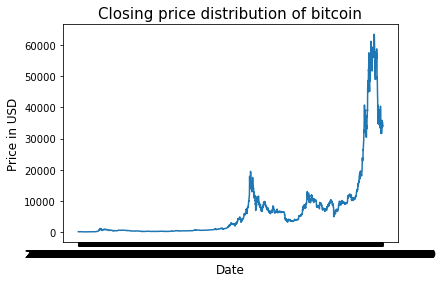

In [74]:
data = df_btc['Close']
Date1 = df_btc['Date']
train1 = df_btc[['Date','Close']]
# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
print (type(train2))
print (train2.head())
plt.plot(train2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()

In [ ]:
# Spliting the data set into train and test set

x_train_Bitcoin, x_test_Bitcoin, y_train_Bitcoin, y_test_Bitcoin = train_test_split(X_Bitcoin,y_Bitcoin,test_size=0.15)

In [ ]:
from itertools import cycle
import plotly.express as px
visualize_Bitcoin = cycle(['Open','Close','High','Low','Prediction'])

fig = px.line(df_btc1, x=df_btc1.Date, y=[df_btc1['Open'], df_btc1['Close'], 
                                          df_btc1['High'], df_btc1['Low'],df_btc1['Prediction']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Bitcoin', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_Bitcoin)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


In [ ]:
# Applying the model

KNN_BTC = KNeighborsRegressor(n_neighbors=5) #5 is the default for the model, check grid search if needed
KNN_BTC.fit(x_train_Bitcoin,y_train_Bitcoin)

# Evaluation of the model

train_accuracy = KNN_BTC.score(x_train_Bitcoin, y_train_Bitcoin)*100
test_accuracy = KNN_BTC.score(x_test_Bitcoin, y_test_Bitcoin)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))


In [ ]:
x_projection_Bitcoin = np.array(df_btc1[['Close']])[-projection_Bitcoin:]
print(x_projection_Bitcoin)

In [ ]:
#Making predictions: 

KNN_prediction_Bitcoin = KNN_BTC.predict(x_projection_Bitcoin)
print(KNN_prediction_Bitcoin)

#### SOLANO

In [ ]:
projection_sol = 5
#creation of a new column with a name prediction
df_sol1['Prediction'] = df_sol1[['Close']].shift(-projection_sol)
df_sol1.tail(7)

In [ ]:
visualize_sol = cycle(['Open','Close','High','Low','Prediction'])

fig = px.line(df_sol1, x=df_sol1.Date, y=[df_sol1['Open'], df_sol1['Close'], 
                                          df_sol1['High'], df_sol1['Low'],df_sol1['Prediction']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Solana', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_sol)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Defining X and y

X_sol = np.array(df_sol1[['Close']])
X_sol = X_sol[:-projection_sol]

y_sol = df_sol1['Prediction'].values
y_sol = y_sol[:-projection_sol]

In [ ]:
#Spliting into train and test set
x_train_sol, x_test_sol, y_train_sol, y_test_sol = train_test_split(X_sol,y_sol,test_size=0.15)

In [ ]:
# Applying the model

KNN_sol = KNeighborsRegressor(n_neighbors=5) #5 is the default for the model, check grid search if needed
KNN_sol.fit(x_train_sol,y_train_sol)

# Evaluation of the model

train_accuracy = KNN_sol.score(x_train_sol, y_train_sol)*100
test_accuracy =KNN_sol.score(x_test_sol,y_test_sol)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))

In [ ]:
x_projection_sol = np.array(df_sol1[['Close']])[-projection_sol:]
print(x_projection_sol)

In [ ]:
#Making predictions: 

KNN_prediction_sol = KNN_sol.predict(x_projection_sol)
print(KNN_prediction_sol)

#### Ethereum

In [ ]:
projection_eth = 5
#creation of a new column with a name prediction
df_eth1['Prediction'] = df_eth1[['Close']].shift(-projection_eth)
df_eth1.tail(7)

In [ ]:
visualize_eth = cycle(['Open','Close','High','Low','Prediction'])

fig = px.line(df_eth1, x=df_eth1.Date, y=[df_eth1['Open'], df_eth1['Close'], 
                                          df_eth1['High'], df_eth1['Low'],df_eth1['Prediction']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Ethereum', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_eth)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Defining X and y

X_eth = np.array(df_eth1[['Close']])
X_eth = X_eth[:-projection_eth]

y_eth = df_eth1['Prediction'].values
y_eth = y_eth[:-projection_sol]


In [ ]:
#Spliting into train and test set
x_train_eth, x_test_eth, y_train_eth, y_test_eth = train_test_split(X_eth,y_eth,test_size=0.15)

In [ ]:
# Applying the model
KNN_eth = KNeighborsRegressor(n_neighbors=5)
KNN_eth.fit(x_train_eth,y_train_eth)

# Evaluation of the model

train_accuracy = KNN_eth.score(x_train_eth, y_train_eth)*100
test_accuracy =KNN_eth.score(x_test_eth,y_test_eth)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))

In [ ]:
x_projection_eth = np.array(df_eth1[['Close']])[-projection_eth:]
print(x_projection_eth)

In [ ]:
#Making predictions: 

KNN_prediction_eth = KNN_eth.predict(x_projection_eth)
print(KNN_prediction_eth)

#### XRP

In [ ]:
projection_xrp = 5
#creation of a new column with a name prediction
df_xrp1['Prediction'] = df_xrp1[['Close']].shift(-projection_xrp)
df_xrp1.tail(7)

In [ ]:
visualize_xrp = cycle(['Open','Close','High','Low','Prediction'])

fig = px.line(df_xrp1, x=df_xrp1.Date, y=[df_xrp1['Open'], df_xrp1['Close'], 
                                          df_xrp1['High'], df_xrp1['Low'],df_xrp1['Prediction']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='XRP', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_xrp)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Defining X and y

X_xrp = np.array(df_xrp1[['Close']])
X_xrp = X_xrp[:-projection_xrp]

y_xrp = df_xrp1['Prediction'].values
y_xrp = y_xrp[:-projection_xrp]

In [ ]:
#Spliting into train and test set

x_train_xrp, x_test_xrp, y_train_xrp, y_test_xrp = train_test_split(X_xrp,y_xrp,test_size=0.15)

In [ ]:
# Applying the model

KNN_xrp = KNeighborsRegressor(n_neighbors=5)
KNN_xrp.fit(x_train_xrp,y_train_xrp)

# Evaluation of the model

train_accuracy = KNN_xrp.score(x_train_xrp, y_train_xrp)*100
test_accuracy =KNN_xrp.score(x_test_xrp,y_test_xrp)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))

In [ ]:
x_projection_xrp = np.array(df_xrp1[['Close']])[-projection_xrp:]
print(x_projection_xrp)

In [ ]:
#making predictions: 

KNN_prediction_xrp = KNN_xrp.predict(x_projection_xrp)
print(KNN_prediction_xrp)

#### ADA

In [ ]:
projection_ada = 5
#creation of a new column with a name prediction
df_ada1['Prediction'] = df_ada1[['Close']].shift(-projection_ada)
df_ada1.tail(7)

In [ ]:
visualize_ada = cycle(['Open','Close','High','Low','Prediction'])

fig = px.line(df_ada1, x=df_ada1.Date, y=[df_ada1['Open'], df_ada1['Close'], 
                                          df_ada1['High'], df_ada1['Low'],df_ada1['Prediction']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Cardano', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_ada)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Defining X and y

X_ada = np.array(df_ada1[['Close']])
X_ada = X_ada[:-projection_ada]

y_ada = df_ada1['Prediction'].values
y_ada = y_ada[:-projection_ada]

In [ ]:
#Spliting into train and test set
x_train_ada, x_test_ada, y_train_ada, y_test_ada = train_test_split(X_ada,y_ada,test_size=0.15)

In [ ]:
# Applying the model

KNN_ada = KNeighborsRegressor(n_neighbors=5)
KNN_ada.fit(x_train_ada,y_train_ada)

# Evaluation of the model

train_accuracy = KNN_ada.score(x_train_ada, y_train_ada)*100
test_accuracy =KNN_ada.score(x_test_ada,y_test_ada)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))

In [ ]:
x_projection_ada = np.array(df_ada1[['Close']])[-projection_ada:]
print(x_projection_ada)

In [ ]:
#making predictions: 

KNN_prediction_ada = KNN_ada.predict(x_projection_ada)
print(KNN_prediction_ada)

# Linear Regression

#### BITCOIN

In [ ]:
# Applying the model

linReg_Bitcoin = LinearRegression()
linear_fit = linReg_Bitcoin.fit(x_train_Bitcoin,y_train_Bitcoin)

# Evaluation of the model

train_accuracy = linReg_Bitcoin.score(x_train_Bitcoin, y_train_Bitcoin)*100
test_accuracy =linReg_Bitcoin.score(x_test_Bitcoin,y_test_Bitcoin)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))

In [ ]:
x_projection_Bitcoin = np.array(df_btc1[['Close']])[-projection_Bitcoin:]
print(x_projection_Bitcoin)

In [ ]:
#Making predictions: 
linReg_prediction_Bitcoin = linReg_Bitcoin.predict(x_projection_Bitcoin)
print(linReg_prediction_Bitcoin)

#### SOLANO

In [ ]:
# Applying the model

linReg_sol = LinearRegression()
linear_fit = linReg_sol.fit(x_train_sol,y_train_sol)

# Evaluation of the model

train_accuracy = linReg_sol.score(x_train_sol, y_train_sol)*100
test_accuracy =linReg_sol.score(x_test_sol,y_test_sol)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))

In [ ]:
x_projection_sol = np.array(df_sol1[['Close']])[-projection_Bitcoin:]
print(x_projection_sol)

In [ ]:
#Making predictions: 
linReg_prediction_sol = linReg_sol.predict(x_projection_sol)
print(linReg_prediction_sol)

#### ETHEREUM

In [ ]:
# Applying the model

linReg_eth = LinearRegression()
linear_fit = linReg_eth.fit(x_train_eth,y_train_eth)

# Evaluation of the model

train_accuracy = linReg_eth.score(x_train_eth, y_train_eth)*100
test_accuracy =linReg_eth.score(x_test_eth,y_test_eth)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))

In [ ]:
x_projection_eth = np.array(df_eth1[['Close']])[-projection_Bitcoin:]
print(x_projection_eth)

In [ ]:
#Making predictions: 
linReg_prediction_eth = linReg_eth.predict(x_projection_eth)
print(linReg_prediction_eth)

#### XRP

In [ ]:
# Applying the model

linReg_xrp = LinearRegression()
linear_fit = linReg_xrp.fit(x_train_xrp,y_train_xrp)

# Evaluation of the model

train_accuracy = linReg_xrp.score(x_train_xrp, y_train_xrp)*100
test_accuracy =linReg_xrp.score(x_test_xrp,y_test_xrp)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))

In [ ]:
x_projection_xrp = np.array(df_xrp1[['Close']])[-projection_Bitcoin:]
print(x_projection_xrp)

In [ ]:
#Making predictions: 
linReg_prediction_xrp = linReg_xrp.predict(x_projection_xrp)
print(linReg_prediction_xrp)

#### ADA

In [ ]:
# Applying the model

linReg_ada = LinearRegression()
linear_fit = linReg_ada.fit(x_train_ada,y_train_ada)

# Evaluation of the model

train_accuracy = linReg_ada.score(x_train_ada, y_train_ada)*100
test_accuracy =linReg_ada.score(x_test_ada,y_test_ada)*100

print("Training set score :"+"{:.2f}%".format(train_accuracy))
print("Test set score :"+"{:.2f}%".format(test_accuracy))

In [ ]:
x_projection_ada = np.array(df_ada1[['Close']])[-projection_Bitcoin:]
print(x_projection_ada)

In [ ]:
#Making predictions: 
linReg_prediction_ada = linReg_ada.predict(x_projection_ada)
print(linReg_prediction_ada)

### Evaluation

In [ ]:
# create data:

data = [["Bitcoin:", 98.34, 98.22], 
        ["Solana:", 97.17, 95.58], 
        ["Ethereum:", 96.46, 96.98], 
        ["XRP:", 94.53, 92.68],
        ['Cardano:', 96.59, 96.45]]
  
#define header names
col_names = ["CRYPTOCURRENCY", "KNN REGRESSION", "LINEAR REGRESSION"]
  
#display table
print('Table of comparison of test sets results between KNN Regression and Linear Regression:')
print(tabulate(data, headers=col_names, tablefmt="fany_grid"))

In [ ]:
data_cross = pd.DataFrame(data)
data_cross.rename(columns={0: "Cryptocurrency", 1: "KNN", 2: "Linear Regression"})

In [ ]:
#Paired t-test to check which model performs better:

a = data_cross.iloc[:, 1]
b = data_cross.iloc[:, -1]


ttest_rel(a, b, alternative='less')

In [ ]:
return_period = 5

In [ ]:
np.log(stk_data.loc[:, ('Adj Close', 'MSFT')])